<a href="https://colab.research.google.com/github/Z4phxr/Machine-Learning-Lab/blob/main/Data_Analysis_Penguins_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Analysis: Penguins Dataset


> This notebook explores the **penguins dataset** using Python libraries like `pandas`, `seaborn`, and `sklearn`.  
> It includes:
> - Data loading and exploration  
> - Numerical feature analysis  
> - Preprocessing steps
> - Insights and observations during the learning process

In [ ]:
import seaborn as sns
import sklearn
from sklearn.preprocessing import LabelEncoder
import pandas as pd

In [ ]:
penguins = sns.load_dataset('penguins')

In [ ]:
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


Numerical features

In [ ]:
penguins.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


In [ ]:
penguins.isna().sum()

,0
species,0
island,0
bill_length_mm,2
bill_depth_mm,2
flipper_length_mm,2
body_mass_g,2
sex,11


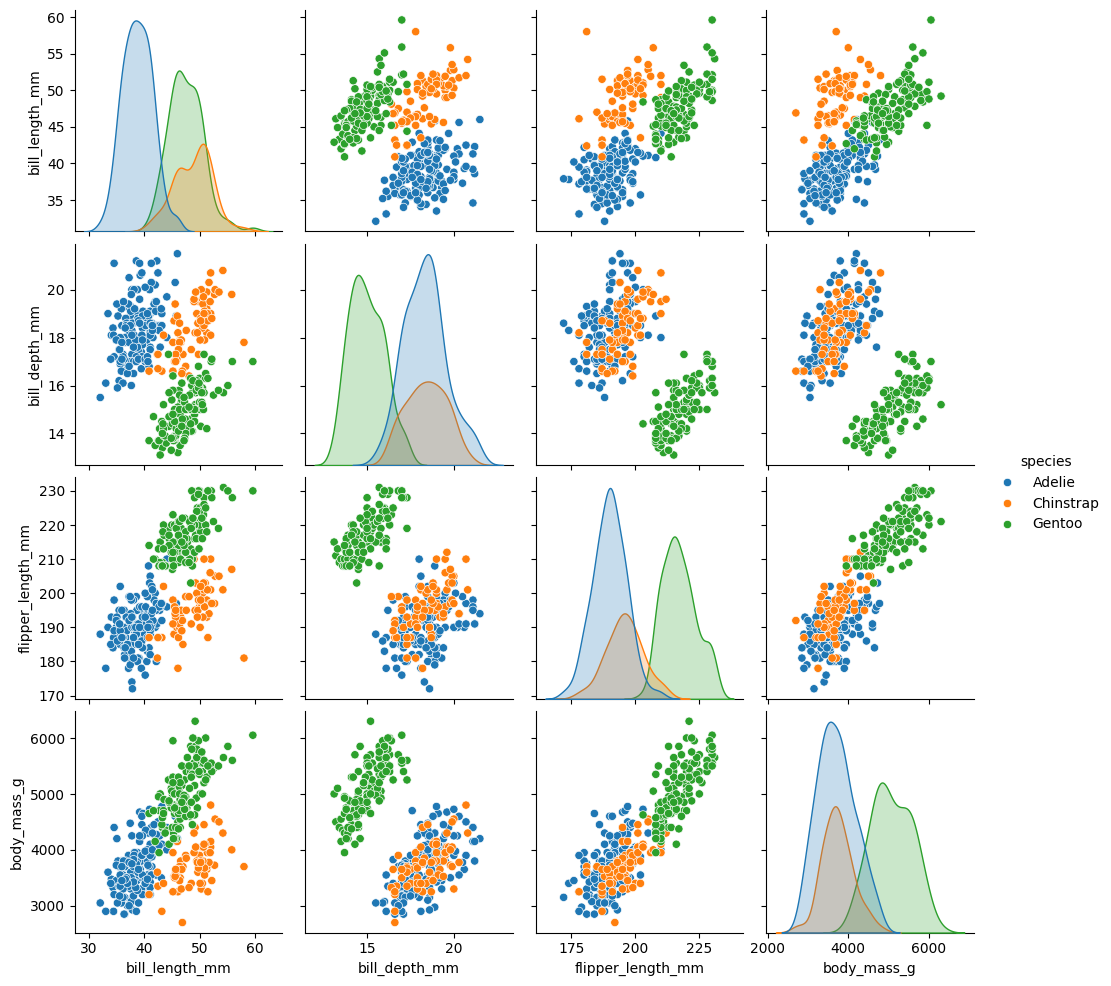

In [ ]:
sns.pairplot(penguins, hue='species', diag_kind='kde')

* Gentoo penguins are the most distinct from the other species, with larger flipper lengths and greater body mass.

<Axes: xlabel='flipper_length_mm', ylabel='bill_length_mm'>

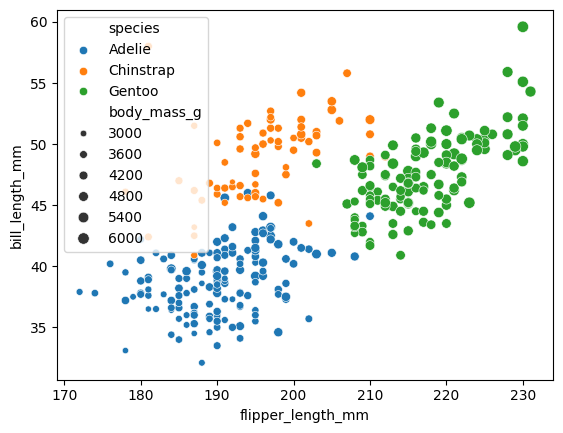

In [ ]:
sns.scatterplot(data=penguins, x='flipper_length_mm', y='bill_length_mm', hue='species', size = 'body_mass_g')

<Axes: xlabel='species', ylabel='body_mass_g'>

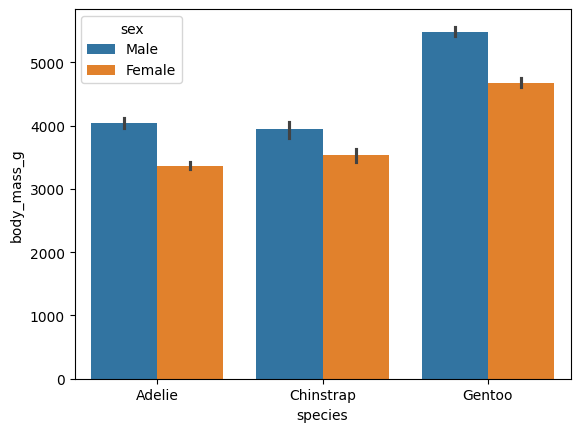

In [ ]:
sns.barplot(x='species', y='body_mass_g', data=penguins, hue="sex")

Gento speciess do in fact have higher average body mass then other species

In [ ]:
species_island_counts = penguins.groupby(['species', 'island']).size().unstack(fill_value=0)
species_island_counts

island,Biscoe,Dream,Torgersen
species,,,
Adelie,44,56,52
Chinstrap,0,68,0
Gentoo,124,0,0


All Gentoo penguins live exclusively on Biscoe Island, while Chinstrap penguins are found only on Dream Island. In contrast, Adelie penguins inhabit all three islands, meaning island location alone cannot be used to reliably predict them.

However, we can make the following assumptions:

* If a penguin is located on Biscoe Island, it is almost certainly a Gentoo penguin.

* If a penguin is located on Dream Island, it is almost certainly a Chinstrap penguin.



We need to identify a feature that can clearly separate Adelie penguins from the other species

In [ ]:
penguins['bill_ratio'] = penguins['bill_length_mm'] / penguins['bill_depth_mm']

<Axes: xlabel='species', ylabel='bill_ratio'>

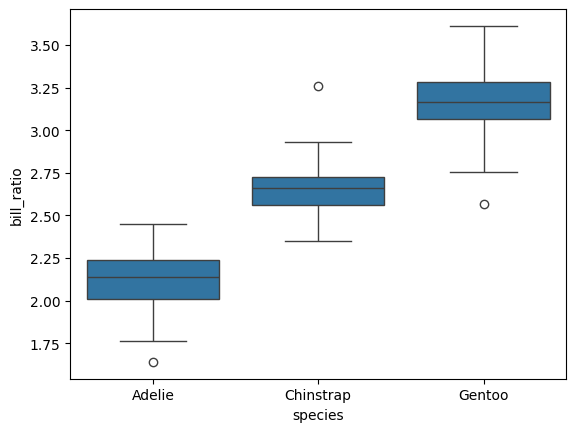

In [ ]:
sns.boxplot(data=penguins, x='species', y='bill_ratio')

<Axes: xlabel='species', ylabel='bill_ratio'>

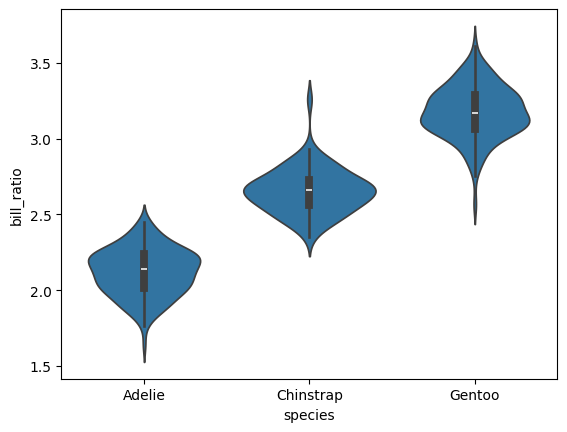

In [ ]:
sns.violinplot(data=penguins, x='species', y='bill_ratio')

One useful feature for distinguishing penguin species is the bill length-to-depth ratio. Among the three species, Adelie penguins tend to have the smallest ratio. This feature is quite distinctive, but we can also investigate whether Adelie penguins are characterized by any other unique traits.

* Are there any differences between Adelie penguins living on different islands?

* Are there any differences between Adelie penguins from Dream Island and Chinstrap penguins?

* Are there any differences between Adelie penguins from Biscoe Island and Gentoo penguins?


In [ ]:
adelie_penguins = penguins[penguins['species']=='Adelie']
chinstrap = penguins[penguins['species']=='Chinstrap']
gentoo_penguins = penguins[penguins['species']=='Gentoo']

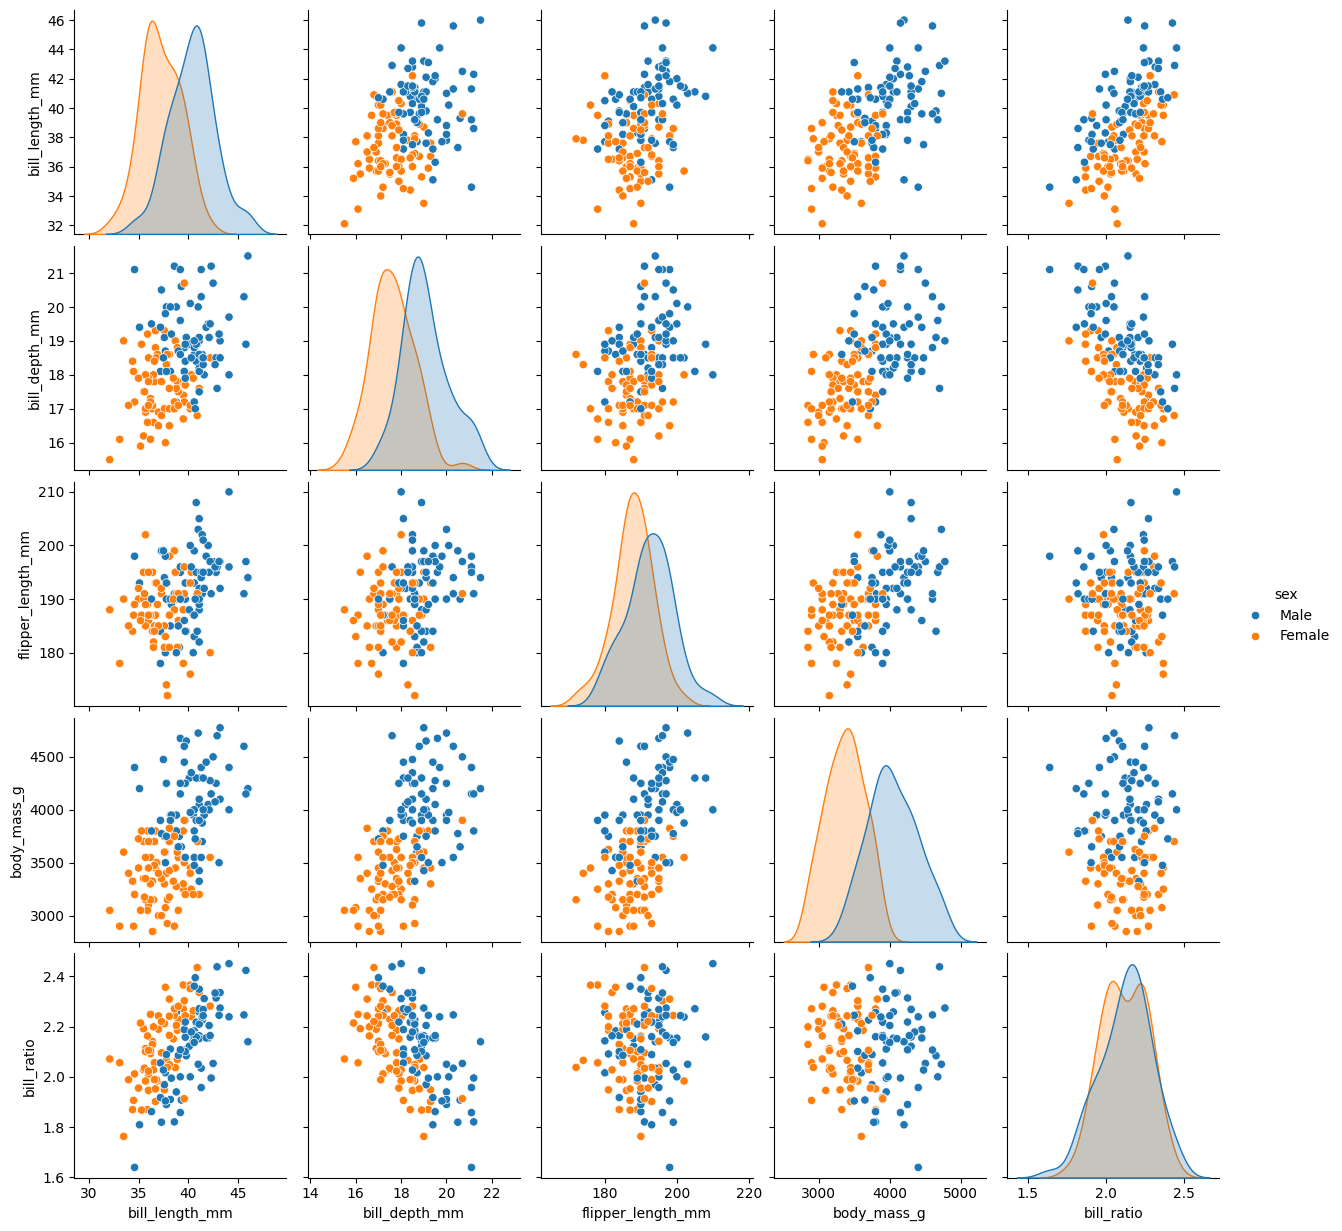

In [ ]:
sns.pairplot(adelie_penguins, hue='sex')

<Axes: xlabel='island', ylabel='body_mass_g'>

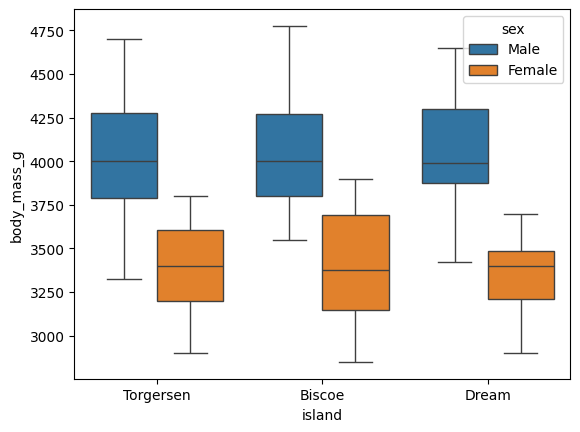

In [ ]:
sns.boxplot(data=adelie_penguins, x='island', y='body_mass_g', hue='sex')

<Axes: xlabel='island', ylabel='bill_ratio'>

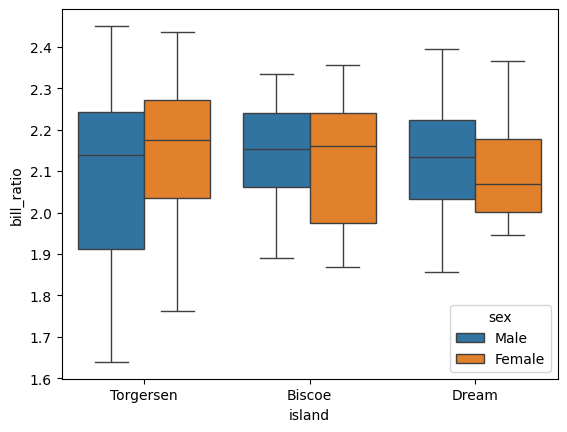

In [ ]:
sns.boxplot(data=adelie_penguins, x='island', y='bill_ratio', hue='sex')

<Axes: xlabel='island', ylabel='flipper_length_mm'>

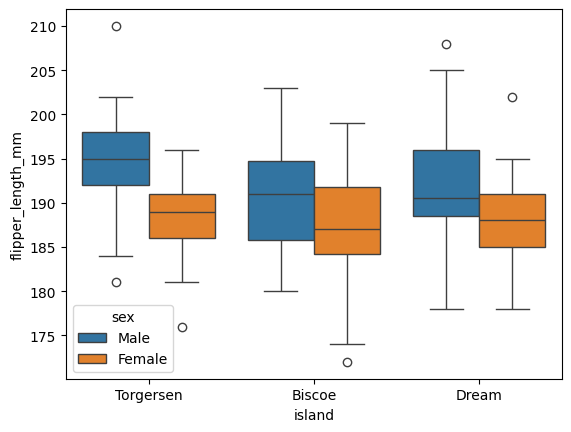

In [ ]:
sns.boxplot(data=adelie_penguins, x='island', y='flipper_length_mm', hue='sex')

There are no significant differences between Adelie penguins inhabiting different islands. The only notable variation is that on Torgersen Island, females have, on average, a larger bill_ratio than males. On Biscoe Island, the ratio is almost the same for both males and females, while on Dream Island, males have a higher ratio.

In [ ]:
sex_island_counts = penguins.groupby(['island', 'sex', 'species']).size().unstack(fill_value=0)
display(sex_island_counts)

species           Adelie  Chinstrap  Gentoo
island    sex                              
Biscoe    Female      22          0      58
          Male        22          0      61
Dream     Female      27         34       0
          Male        28         34       0
Torgersen Female      24          0       0
          Male        23          0       0

The number of Adelie penguin samples is fairly consistent across all three islands. However, the sample size is too small, and the differences are too minor to conclude that island location has any significant effect on the bill ratio between males and females.

In conclusion, there are no meaningful differences between Adelie penguins inhabiting different islands.

<Axes: xlabel='island', ylabel='bill_ratio'>

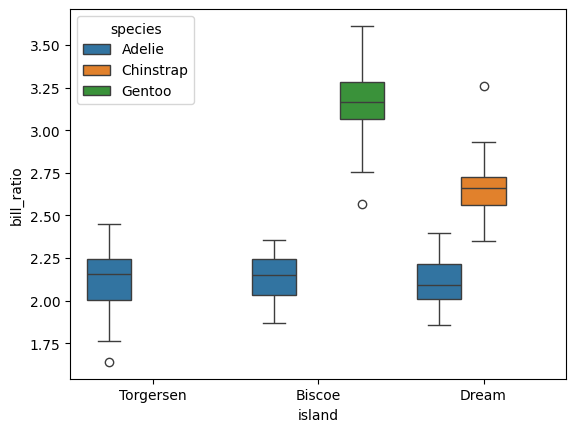

In [ ]:
sns.boxplot(data=penguins, x='island', y='bill_ratio', hue='species')

We can easily predict whether a penguin on Biscoe Island is a Gentoo or an Adelie penguin based on its bill_ratio. It is slightly harder to distinguish Chinstrap penguins because their data is closer to Adelie, but the separation is still fairly clear.

<Axes: xlabel='island', ylabel='body_mass_g'>

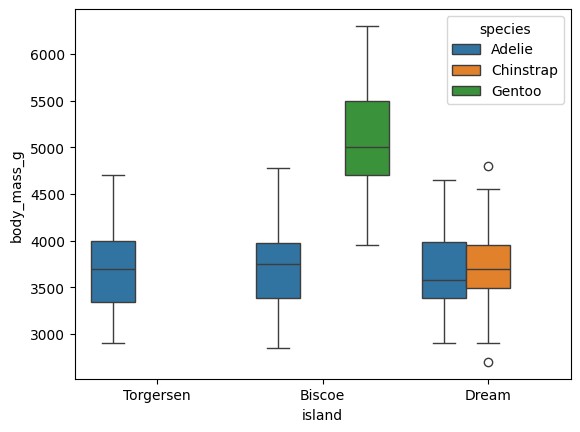

In [ ]:
sns.boxplot(data=penguins, x='island', y='body_mass_g', hue='species')

<Axes: xlabel='island', ylabel='flipper_length_mm'>

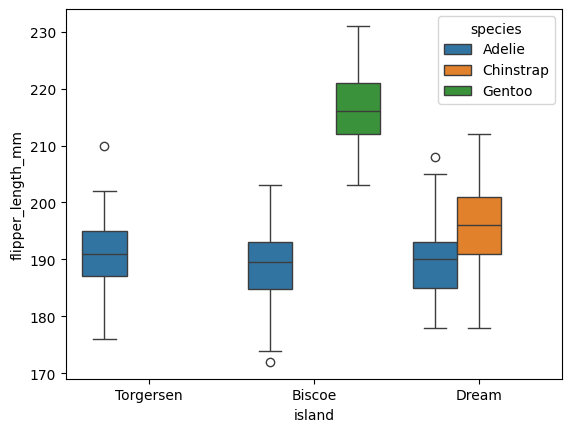

In [ ]:
sns.boxplot(data=penguins, x='island', y='flipper_length_mm', hue='species')

After examining body mass and flipper length, we can see that these features do not separate the data as effectively as bill_ratio.

# Acurracy test

We can now try to build a model using only the island the penguin comes from and the bill_ratio to see how well it performs compared to a model that uses all available features.


In [ ]:
penguins_clean = penguins.dropna(subset=['island', 'bill_ratio', 'species'])
X = penguins_clean[['island', 'bill_ratio']]
y = penguins_clean['species']
X = pd.get_dummies(X, columns=['island'], drop_first=True)
le = LabelEncoder()
y = le.fit_transform(y)

print(X.head())

   bill_ratio  island_Dream  island_Torgersen
0    2.090909         False              True
1    2.270115         False              True
2    2.238889         False              True
4    1.901554         False              True
5    1.907767         False              True


In [ ]:
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size=0.2, random_state=42)
my_model = sklearn.tree.DecisionTreeClassifier(random_state=42).fit(X_train, y_train)
my_score = my_model.score(X_test, y_test)
print(my_score)

0.9855072463768116


In [ ]:
penguins_clean = penguins.dropna(subset=['island', 'bill_length_mm', 'bill_depth_mm', 'species'])

X = penguins_clean[['island', 'bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']]
y = penguins_clean['species']

X = pd.get_dummies(X, columns=['island'], drop_first=True)
le = LabelEncoder()
y = le.fit_transform(y)

X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size=0.2, random_state=42)

model = sklearn.tree.DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)
score = model.score(X_test, y_test)
print(score)

0.9710144927536232


In [ ]:
print(f"Simpler model achieved a score {my_score - score:.4f} higher than the one with more features.")

Simpler model achieved a score 0.0145 higher than the one with more features.


The test results show that using only two features for training the model, instead of five, not only did not reduce performance but even slightly improved the score. This demonstrates that by selecting features intelligently, we can reduce training time and resource usage while maintaining or even improving model performance. Feature selection can be done in several ways, such as manual selection based on domain knowledge, correlation analysis, feature importance ranking, recursive feature elimination (RFE), or regularization techniques like Lasso.

In this case, the feature reduction was performed manually to better understand the data and the impact of each feature. This experiment also highlights that simpler models can sometimes make better predictions and that reducing complexity can help mitigate the risk of overfitting.